In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as pylt

import scipy.stats as stats


In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import sklearn.metrics as metrics

In [3]:
import seaborn as sns

In [4]:
train = pd.read_csv('c:/my_computer/data_file/NSL_Dataset/Train.txt')

In [5]:
train.head(3)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21


In [254]:
test = pd.read_csv('c:/my_computer/data_file/NSL_Dataset/Test.txt')

In [7]:
test.head(3)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0,saint,15


### data prepration

In [8]:
col_list = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
            "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
            "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
            "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate","rerror_rate","srv_rerror_rate",
            "same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
            "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
            "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
            "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

train.columns = col_list

train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21


In [256]:
test.columns = col_list
test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0,saint,15


### missing values

In [10]:
# Treating Missing values
def missing_values(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
         x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode()[0])
    return x

In [11]:
train = train.apply(missing_values)

In [12]:
test = test.apply(missing_values)

In [13]:
cat_list = ['protocol_type','service','flag','land','logged_in','root_shell','urgent','num_failed_logins',
            'su_attempted','is_host_login','is_guest_login','attack','wrong_fragment','num_shells','num_outbound_cmds']

In [14]:
num_list = ['duration','src_bytes','dst_bytes','hot',
            'num_compromised','num_root','num_file_creations','last_flag','num_access_files',
            'count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
            'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
            'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
            'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']

In [15]:
train_cat = train[cat_list]

train_num = train[num_list]

In [16]:
test_cat = test[cat_list]

test_num = test[num_list]

### data analysis

In [17]:
#Numerical data Analysis :
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(),x.nunique(), x.sum(), x.mean(), x.median(),  x.std(), x.var(),
                      x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),
                      x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS','nunique', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,
                         'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [18]:
train_num.apply(var_summary).T

,N,NMISS,nunique,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,2981.0,3.617247e+07,287.146929,0.00,2.604526e+03,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,3341.0,5.740179e+09,45567.100824,44.00,5.870354e+06,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,9326.0,2.491634e+09,19779.271433,0.00,4.021285e+06,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
hot,125972.0,0.0,28.0,2.575000e+04,0.204411,0.00,2.149977e+00,4.622401e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_compromised,125972.0,0.0,88.0,3.517800e+04,0.279253,0.00,2.394214e+01,5.732259e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03
num_root,125972.0,0.0,82.0,3.806800e+04,0.302194,0.00,2.439971e+01,5.953461e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.468000e+03
num_file_creations,125972.0,0.0,35.0,1.596000e+03,0.012669,0.00,4.839370e-01,2.341950e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.300000e+01
last_flag,125972.0,0.0,22.0,2.456965e+06,19.504056,20.00,2.291512e+00,5.251025e+00,0.0,11.0,15.00,17.00,18.00,20.00,21.00,21.00,21.00,21.00,2.100000e+01
num_access_files,125972.0,0.0,10.0,5.160000e+02,0.004096,0.00,9.936995e-02,9.874387e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.000000e+00
count,125972.0,0.0,512.0,1.059528e+07,84.108207,14.00,1.145088e+02,1.311227e+04,0.0,1.0,1.00,1.00,2.00,14.00,143.00,256.00,286.00,511.00,5.110000e+02


In [19]:
test_num.apply(var_summary).T

,N,NMISS,nunique,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22543.0,0.0,624.0,4.933959e+06,218.868784,0.00,1407.207069,1.980232e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.5800,57715.0
src_bytes,22543.0,0.0,1149.0,2.343550e+08,10395.911369,54.00,472796.912692,2.235369e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.0000,62825648.0
dst_bytes,22543.0,0.0,3650.0,4.635089e+07,2056.110012,46.00,21219.763847,4.502784e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.40,8314.00,26032.7600,1345927.0
hot,22543.0,0.0,16.0,2.376000e+03,0.105399,0.00,0.928448,8.620164e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0000,101.0
num_compromised,22543.0,0.0,23.0,2.703000e+03,0.119904,0.00,7.269758,5.284939e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,796.0
num_root,22543.0,0.0,20.0,2.585000e+03,0.114670,0.00,8.041792,6.467042e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,878.0
num_file_creations,22543.0,0.0,9.0,1.970000e+02,0.008739,0.00,0.676857,4.581350e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,100.0
last_flag,22543.0,0.0,22.0,4.061760e+05,18.017833,20.00,4.270409,1.823640e+01,0.0,2.0,9.00,12.00,17.00,20.00,21.00,21.00,21.00,21.0000,21.0
num_access_files,22543.0,0.0,5.0,8.000000e+01,0.003549,0.00,0.067831,4.601016e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,4.0
count,22543.0,0.0,495.0,1.781386e+06,79.021692,8.00,128.538218,1.652207e+04,0.0,1.0,1.00,1.00,1.00,8.00,123.00,256.00,400.90,511.0000,511.0


### outlier

In [20]:
# treating outliers
def outlier_clip(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [21]:
train_num=train_num.apply(outlier_clip)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [22]:
train_num.apply(var_summary).T

,N,NMISS,nunique,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,1767.0,1.911169e+07,151.713784,0.00,1095.867911,1.200926e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.1682,9590.58
src_bytes,125972.0,0.0,3223.0,1.296885e+08,1029.502397,44.00,6137.925753,3.767413e+07,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.0000,54540.00
dst_bytes,125972.0,0.0,8405.0,1.690707e+08,1342.129203,0.00,3804.307224,1.447275e+07,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.0000,25519.00
hot,125972.0,0.0,4.0,6.238000e+03,0.049519,0.00,0.351828,1.237833e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0000,3.00
num_compromised,125972.0,0.0,2.0,1.286000e+03,0.010209,0.00,0.100521,1.010448e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,1.00
num_root,125972.0,0.0,1.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
num_file_creations,125972.0,0.0,1.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
last_flag,125972.0,0.0,11.0,2.462267e+06,19.546145,20.00,2.061403,4.249381e+00,11.0,11.0,15.00,17.00,18.00,20.00,21.00,21.00,21.00,21.0000,21.00
num_access_files,125972.0,0.0,1.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
count,125972.0,0.0,511.0,1.059529e+07,84.108310,14.00,114.508753,1.311225e+04,1.0,1.0,1.00,1.00,2.00,14.00,143.00,256.00,286.00,511.0000,511.00


In [23]:
test_num=test_num.apply(outlier_clip)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


### correlation 

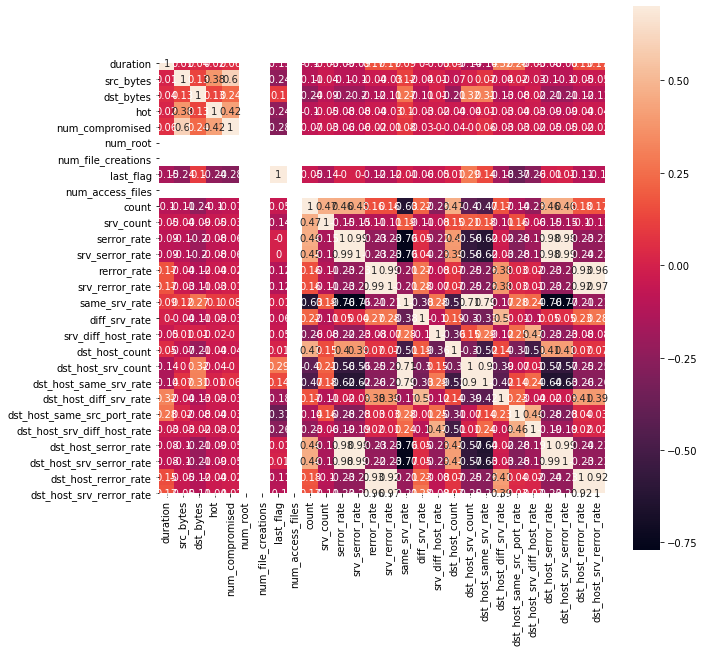

In [24]:
# checking correlation via heatmap
corr = np.round(train_num.corr(),2)
pylt.figure(figsize=(10,10))
sns.heatmap(data=corr, vmax=.7, square=True,annot=True)

In [25]:
#From above correlation plot
#----> num_root, num_file_creations and num_access_files have no relation with others
#----> dst_host_serror_rate is positively correlated with serror_rate, srv_serror_rate and dst_host_srv_serror_rate
#----> dst_host_srv_serror_rate is positively correlated with serror_rate, srv_serror_rate and dst_host_serror_rate
#----> dst_host_rerror_rate is positively correlated with rerror_rate, srv_rerror_rate and dst_host_srv_rerror_rate
#----> dst_host_srv_rerror_rate is positively correlated with rerror_rate, srv_rerror_rate and dst_host_rerror_rate
#----> dst_host_same_srv_rate is positively correlated with same_srv_rate and dst_host_srv_count
#----> dst_host_srv_count is positively correlated with same_srv_rate and dst_host_same_srv_count
#----> srv_serror_rate is positively correlated with serror_rate
#----> srv_rerror_rate is positively correlated with rerror_rate
#----> dst_host_same_srv_rate is Negalively correlated with serror_rate and srv_serror_rate
#----> same_srv_rate is Negalively correlated with count, serror_rate and srv_serror_rate

In [26]:
train_num.drop(['num_root','num_file_creations','num_access_files','dst_host_serror_rate',
               'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
                'dst_host_same_srv_rate','dst_host_srv_count','srv_serror_rate',
                'srv_rerror_rate','same_srv_rate'],axis=1,inplace=True)

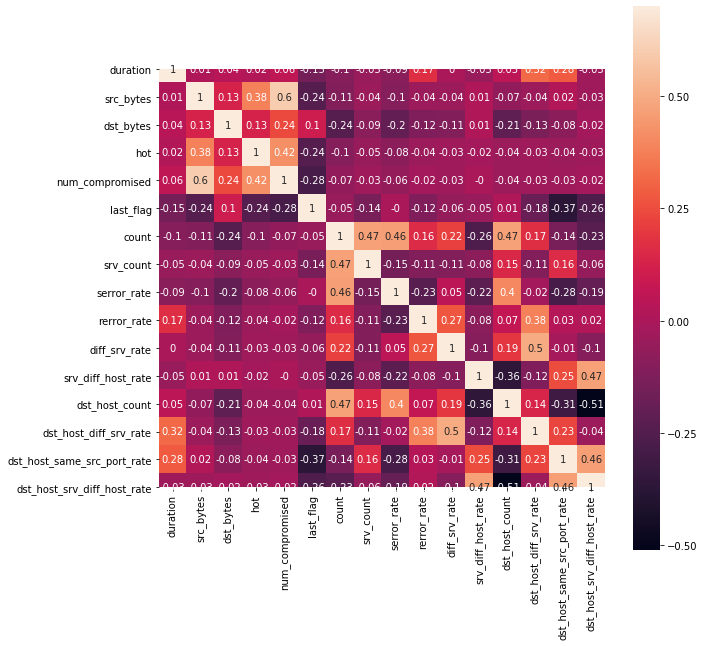

In [27]:
# checking correlation via heatmap
corr = np.round(train_num.corr(),2)
pylt.figure(figsize=(10,10))
sns.heatmap(data=corr, vmax=.7, square=True,annot=True)

In [28]:
train_cat['Activity'] = train_cat.attack.apply(lambda x : 'normal' if x == 'normal' else 'attack')

test_cat['Activity'] = test_cat.attack.apply(lambda x : 'normal' if x == 'normal' else 'attack')

train_cat.drop(['attack'],axis=1,inplace=True)
test_cat.drop(['attack'],axis=1,inplace=True)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashu\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [29]:
# creating dummy
def create_dummy(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies],axis=1)
    df.drop(colname,axis=1, inplace=True)
    return df

In [30]:
# implementing creatin of dummy def for train data
for c_features in train_cat.columns:
    train_cat[c_features] = train_cat[c_features].astype('category')
    train_cat = create_dummy(train_cat,c_features)
    
# implementing creatin of dummy def for test data
for c_features in test_cat.columns:
    test_cat[c_features] = test_cat[c_features].astype('category')
    test_cat = create_dummy(test_cat,c_features)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
train_final = pd.concat([train_num,train_cat],axis=1)
test_final = pd.concat([test_num,test_cat],axis=1)

In [33]:
train_final.head(3)

,duration,src_bytes,dst_bytes,hot,num_compromised,last_flag,count,srv_count,serror_rate,rerror_rate,...,num_failed_logins_5,su_attempted_1,su_attempted_2,is_host_login_1,is_guest_login_1,wrong_fragment_1,wrong_fragment_3,num_shells_1,num_shells_2,Activity_normal
0,0.0,146,0,0,0,15,13,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0,0,0,0,19,123,6,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,232,8153,0,0,21,5,5,0.2,0.0,...,0,0,0,0,0,0,0,0,0,1


# `Binomial Classification: Activity is normal or attack`

### feature selection

In [33]:
somerced_val = pd.DataFrame()
for i_var in train_final.columns.difference(['Activity_normal']):
    model = smf.logit('Activity_normal~'+str(i_var), data=train_final).fit(method='nm')
    somerce_d = 2*metrics.roc_auc_score(train_final.Activity_normal, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.686022
         Iterations: 11
         Function evaluations: 21


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [36]:
somerced_val.columns = ['var', 'SomerceD']
somerced_val.sort_values(by = 'SomerceD', inplace=True, ascending=False)
somerced_val.to_csv('somerce_d.csv')
somerced_val

,var,SomerceD
0,dst_bytes,0.799057
0,src_bytes,0.797324
0,flag_SF,0.744312
0,diff_srv_rate,0.689471
0,logged_in_1,0.676629
...,...,...
0,urgent_1,1.04365e-05
0,duration,-0.0816933
0,srv_count,-0.117776
0,dst_host_same_src_port_rate,-0.259158


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [38]:
#RFE
X = train_final[train_final.columns.difference(['Activity_normal'])]
y = train_final[['Activity_normal']]

rfe = RFE(RandomForestClassifier(), 20)
rfe = rfe.fit(X, y)

C:\Users\Ashu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Ashu\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\Ashu\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\Ashu\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

KeyboardInterrupt: 

In [ ]:
X.columns[rfe.get_support()]

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
#SelectKbest
SKB = SelectKBest(f_classif, k=20).fit(X, y )
X.columns[SKB.get_support()]

In [34]:
#Final list
Final_list = [
    'count',
'diff_srv_rate',
'dst_bytes',
'dst_host_count',
'dst_host_diff_srv_rate',
'flag_REJ',
'rerror_rate',
'flag_S0',
#'flag_SF',
#'last_flag',
#'logged_in_1',
'protocol_type_udp',
'src_bytes',
#'serror_rate',
'service_domain_u',
'service_eco_i',
'service_ecr_i',
'service_http',
'service_private',
'service_smtp',
]

In [35]:
X_new = train_final[Final_list]
y = train_final['Activity_normal']

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
3,5.228342,dst_host_count
6,4.753627,rerror_rate
5,4.061347,flag_REJ
8,3.714372,protocol_type_udp
7,3.670801,flag_S0
0,3.533780,count
10,3.033734,service_domain_u
4,2.034405,dst_host_diff_srv_rate
13,1.862147,service_http
14,1.674250,service_private


### model building

In [38]:
data_final1 = pd.concat([X_new, y], axis=1)

#split the data into train & test (70%:30%)
df1_train, df1_test = train_test_split(data_final1, test_size = 0.3, random_state=123 )

In [39]:
eqn = 'Activity_normal~ '+'+'.join(X_new.columns.difference(['Activity_normal']))

In [40]:
model_logit = smf.logit(formula=eqn,data=df1_train).fit()

Optimization terminated successfully.
         Current function value: 0.100812
         Iterations 11


In [41]:
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:        Activity_normal   No. Observations:                88180
Model:                          Logit   Df Residuals:                    88163
Method:                           MLE   Df Model:                           16
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:                  0.8540
Time:                        17:06:41   Log-Likelihood:                -8889.6
converged:                       True   LL-Null:                       -60896.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.2386      0.060     54.083      0.000       3.121       3.356
count                     -0.0153      0.000    -36.652      0.000      -0.016      -0.014
diff

### predicting the probability

In [42]:
df1_train['pred_prob'] =model_logit.predict(df1_train)
df1_test['pred_prob'] =model_logit.predict(df1_test)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
train_Gini = 2*metrics.roc_auc_score(df1_train.Activity_normal, df1_train.pred_prob)-1
print('Gini_TRAINING :',train_Gini)
print('AUC_TRAINING  :',metrics.roc_auc_score(df1_train.Activity_normal, df1_train.pred_prob))

Gini_TRAINING : 0.9854883453088572
AUC_TRAINING  : 0.9927441726544286


In [44]:
test_Gini = 2*metrics.roc_auc_score(df1_test.Activity_normal, df1_test.pred_prob)-1
print('Gini_TRAINING :',test_Gini)
print('AUC_TRAINING  :',metrics.roc_auc_score(df1_test.Activity_normal, df1_test.pred_prob))

Gini_TRAINING : 0.9850812916562104
AUC_TRAINING  : 0.9925406458281052


### Validation of model

In [46]:
import sklearn.metrics as metrics

In [45]:
df1_train['y_pred'] = np.where(df1_train.pred_prob>0.8, 1, 0)
df1_test['y_pred'] = np.where(df1_test.pred_prob>0.8, 1, 0)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
metrics.confusion_matrix(df1_train.Activity_normal, df1_train.y_pred)

array([[40064,   875],
       [ 2562, 44679]], dtype=int64)

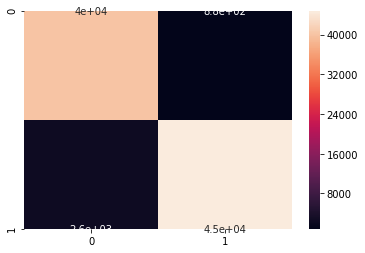

In [48]:
sns.heatmap(metrics.confusion_matrix(df1_train.Activity_normal, df1_train.y_pred),annot=True )

In [49]:
metrics.confusion_matrix(df1_test.Activity_normal, df1_test.y_pred)

array([[17285,   406],
       [ 1061, 19040]], dtype=int64)

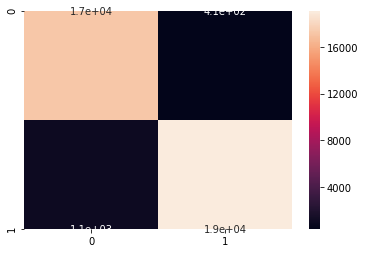

In [50]:
sns.heatmap(metrics.confusion_matrix(df1_test.Activity_normal, df1_test.y_pred),annot=True )

In [51]:
print(metrics.classification_report(df1_train.Activity_normal, df1_train.y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     40939
           1       0.98      0.95      0.96     47241

    accuracy                           0.96     88180
   macro avg       0.96      0.96      0.96     88180
weighted avg       0.96      0.96      0.96     88180



In [52]:
print(metrics.classification_report(df1_test.Activity_normal, df1_test.y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     17691
           1       0.98      0.95      0.96     20101

    accuracy                           0.96     37792
   macro avg       0.96      0.96      0.96     37792
weighted avg       0.96      0.96      0.96     37792



### Predicting the test data

In [53]:
test_new = test_final[Final_list]

In [54]:
data_test_final = pd.concat([test_new,test_final['Activity_normal']], axis=1)

In [55]:
data_test_final['pred_prob'] =model_logit.predict(data_test_final)
data_test_final['y_pred'] = np.where(data_test_final.pred_prob>0.8, 1, 0)

[[9792 3040]
 [1050 8661]]


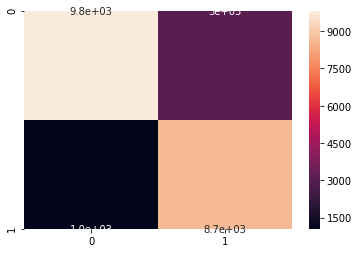

In [56]:
print(metrics.confusion_matrix(data_test_final.Activity_normal, data_test_final.y_pred))
sns.heatmap(metrics.confusion_matrix(data_test_final.Activity_normal, data_test_final.y_pred),annot=True )

In [57]:
print(metrics.classification_report(data_test_final.Activity_normal, data_test_final.y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83     12832
           1       0.74      0.89      0.81      9711

    accuracy                           0.82     22543
   macro avg       0.82      0.83      0.82     22543
weighted avg       0.83      0.82      0.82     22543



In [58]:
data_test_final['Activity_bino'] = data_test_final.Activity_normal.apply(lambda x : 'normal' if x == 1 else 'Attack' )

# `Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R`

In [59]:
Dos_list = ['back', 'land', 'neptune', 'pod','smurf','teardrop','apache2', 'udpstorm','processtable', 'worm']
Probe_list = ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']
R2L_list = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster',
            'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named']
U2R_list = ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps']

In [60]:
train_final = train_final.drop(['Activity_normal'],axis=1)

test_final = test_final.drop(['Activity_normal'],axis=1)

In [61]:
train_final['Activity_class'] = train.attack.apply(lambda x : 'Dos' if x in Dos_list else 'Probe' if x in Probe_list else 'R2L' if x in R2L_list else 'U2R' if x in U2R_list else 'normal')

test_final['Activity_class'] = test.attack.apply(lambda x : 'Dos' if x in Dos_list else 'Probe' if x in Probe_list else 'R2L' if x in R2L_list else 'U2R' if x in U2R_list else 'normal')

In [195]:
#splitting 
tXx = train_final.drop(columns=['Activity_class'])
tyy = train_final["Activity_class"]

In [63]:
from sklearn.preprocessing import LabelEncoder

In [196]:
tXx.drop(['service_http_2784',
'service_http_8001',
'service_red_i',
'service_urh_i',
'num_failed_logins_5',
'service_aol',
'service_harvest'
],axis=1,inplace=True)

In [220]:
#Encoder for y variable
enc =LabelEncoder()
tyy = enc.fit_transform(tyy)

In [221]:
pd.Series(tyy).value_counts()

4    67342
0    45927
1    11656
2      995
3       52
dtype: int64

In [222]:
#splitting to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(tXx, tyy, test_size = 0.3, random_state=123)

In [114]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

### model building

In [223]:
#XGBoost with depth of 15 and restriction level 7 
xgb = XGBClassifier(n_estimators=100,
                    max_depth=15, 
                    gamma = 7)
xgb = xgb.fit(X_train,y_train)

### predition on train data 

In [93]:
from sklearn.metrics import accuracy_score

In [225]:
X_train_pred = xgb.predict(X_train)

In [226]:
accuracy = accuracy_score(y_train, X_train_pred) 

print("Accuracy Train: %.2f%%" % (accuracy * 100.0))

Accuracy Train: 99.92%


In [227]:
metrics.confusion_matrix(y_train, X_train_pred)

array([[32047,     1,     0,     0,     6],
       [    2,  8159,     0,     0,    10],
       [    0,     0,   659,     3,    14],
       [    0,     2,     2,    19,    15],
       [    1,    10,     5,     0, 47225]], dtype=int64)

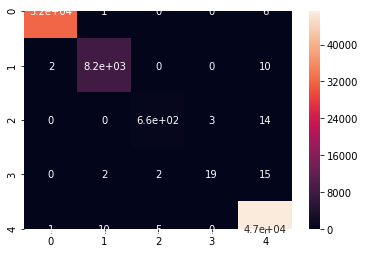

In [228]:
sns.heatmap(metrics.confusion_matrix(y_train, X_train_pred), annot=True)

In [229]:
print(metrics.classification_report(y_train, X_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32054
           1       1.00      1.00      1.00      8171
           2       0.99      0.97      0.98       676
           3       0.86      0.50      0.63        38
           4       1.00      1.00      1.00     47241

    accuracy                           1.00     88180
   macro avg       0.97      0.89      0.92     88180
weighted avg       1.00      1.00      1.00     88180



### validation with test data

In [230]:
X_test_pred = xgb.predict(X_test)

In [231]:
accuracy = accuracy_score(y_test, X_test_pred) 

print("Accuracy Test: %.2f%%" % (accuracy * 100.0))

Accuracy Test: 99.87%


In [232]:
metrics.confusion_matrix(y_test, X_test_pred)

array([[13873,     0,     0,     0,     0],
       [    2,  3473,     1,     0,     9],
       [    0,     0,   306,     3,    10],
       [    0,     0,     1,     8,     5],
       [    2,    10,     5,     0, 20084]], dtype=int64)

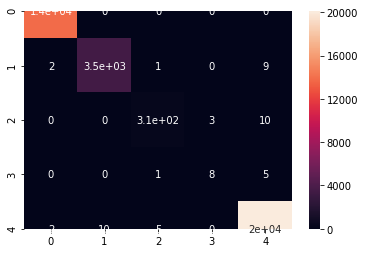

In [233]:
sns.heatmap(metrics.confusion_matrix(y_test, X_test_pred), annot=True)

In [234]:
print(metrics.classification_report(y_test, X_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13873
           1       1.00      1.00      1.00      3485
           2       0.98      0.96      0.97       319
           3       0.73      0.57      0.64        14
           4       1.00      1.00      1.00     20101

    accuracy                           1.00     37792
   macro avg       0.94      0.91      0.92     37792
weighted avg       1.00      1.00      1.00     37792



### preticting the test sample

In [235]:
#splitting 
ttx = test_final.drop(columns=['Activity_class'])

In [236]:
ttx.drop(['dst_host_same_srv_rate',
'dst_host_serror_rate',
'dst_host_srv_count',
'dst_host_srv_rerror_rate',
'dst_host_srv_serror_rate',
'num_access_files',
'num_file_creations',
'num_root',
'same_srv_rate',
'srv_rerror_rate',
'srv_serror_rate',
'num_shells_5',
'dst_host_rerror_rate'
],axis=1,inplace=True)

In [241]:
tty = test_final.Activity_class.apply(lambda x: 4 if x =='normal' else 0 if x == 'Dos' else 1 if x == 'Probe' else 2 if x =='R2L'else 3)

In [242]:
test_pred = xgb.predict(ttx)

In [243]:
accuracy = accuracy_score(tty, test_pred) 

print("Accuracy Test: %.2f%%" % (accuracy * 100.0))

Accuracy Test: 82.00%


In [244]:
metrics.confusion_matrix(tty, test_pred)

array([[6362,  208,    0,    0,  596],
       [ 166, 1638,    0,    0,  617],
       [   1,  270,  745,    6, 1863],
       [   0,    0,    8,   30,   29],
       [  69,  222,    2,    0, 9711]], dtype=int64)

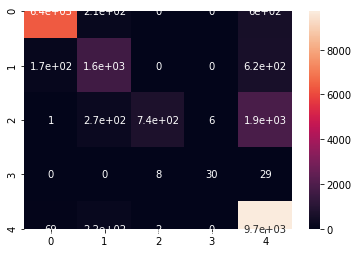

In [246]:
sns.heatmap(metrics.confusion_matrix(tty, test_pred), annot=True)

In [247]:
print(metrics.classification_report(tty, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7166
           1       0.70      0.68      0.69      2421
           2       0.99      0.26      0.41      2885
           3       0.83      0.45      0.58        67
           4       0.76      0.97      0.85     10004

    accuracy                           0.82     22543
   macro avg       0.85      0.65      0.69     22543
weighted avg       0.85      0.82      0.80     22543



In [249]:
data_test_final['Activity_multi'] = tty.apply(lambda x: 'normal' if x ==4 else 'Dos' if x == 0 else 'Probe' if x == 1 else 'R2L' if x ==2 else 'U2R')

In [250]:
data_test_final

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,flag_REJ,rerror_rate,flag_S0,protocol_type_udp,src_bytes,...,service_eco_i,service_ecr_i,service_http,service_private,service_smtp,Activity_normal,pred_prob,y_pred,Activity_bino,Activity_multi
0,136,0.06,0.0,255,0.06,1,1.0,0,0,0,...,0,0,0,1,0,0,0.000513,0,Attack,Dos
1,1,0.00,0.0,134,0.04,0,0.0,0,0,12983,...,0,0,0,0,0,1,0.860899,1,normal,normal
2,1,0.00,0.0,3,0.00,0,0.0,0,0,20,...,1,0,0,0,0,0,0.108721,0,Attack,Probe
3,1,0.00,15.0,29,0.17,0,1.0,0,0,0,...,0,0,0,0,0,0,0.270093,0,Attack,Probe
4,4,0.00,14515.0,155,0.00,0,0.0,0,0,267,...,0,0,1,0,0,1,0.990637,1,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,1,0.00,333.0,100,0.06,0,0.0,0,0,794,...,0,0,0,0,1,1,0.997328,1,normal,normal
22539,2,0.00,938.0,197,0.00,0,0.0,0,0,317,...,0,0,1,0,0,1,0.994408,1,normal,normal
22540,5,0.00,8314.0,255,0.00,0,0.0,0,0,54540,...,0,0,1,0,0,0,0.525485,0,Attack,Dos
22541,4,0.00,42.0,255,0.01,0,0.0,0,1,42,...,0,0,0,0,0,1,0.999916,1,normal,normal


In [295]:
test_output = pd.concat([data_test_final['Activity_bino'],data_test_final['Activity_multi']],axis=1)

In [296]:
test_output['Attack'] = test.attack

In [298]:
test_output.columns = ['Pred_binomial', 'Pred_multinomial', "input_attack"]

In [299]:
test_output

,Pred_binomial,Pred_multinomial,input_attack
0,Attack,Dos,neptune
1,normal,normal,normal
2,Attack,Probe,saint
3,Attack,Probe,mscan
4,normal,normal,normal
...,...,...,...
22538,normal,normal,normal
22539,normal,normal,normal
22540,Attack,Dos,back
22541,normal,normal,normal


In [300]:
test_output.to_csv('test_output.csv')